# TP 6 Réseaux de neurones - Multi classification et Propagation en arrière


# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

# Lecture des fichiers de données

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(5000, 401)

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,:-1]))
y=data[:,-1]
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [4]:
print('X', X.shape ,' y ', y.shape)

X (5000, 401)  y  (5000, 1)


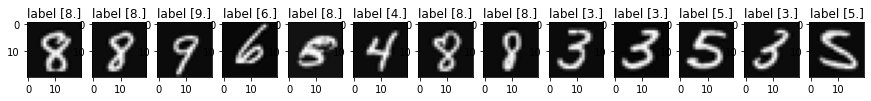

In [5]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c,1:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(y[c]))
    plt.imshow(a,cmap='gray')

In [6]:
YY=np.zeros((y.shape[0], int(np.max(y))+1))
for i in range (YY.shape[0]):
    YY[i,int(y[i])]=1

# Réseaux de neurones
Pour cette partie, nous choisissons une réseau simple:

- une couche d'entrée avec 400 noeuds (20 x 20 pixels) + le biais
- une couche cachée avec 25 noeuds
- une couche de sortie avec 10 noeuds (nombre de classes)

In [7]:
# poids de la couche 1
W1 = np.genfromtxt('W1.csv', delimiter=',', dtype=float)
W1.shape

(25, 401)

In [8]:
# poids de la couche 2
W2 = np.genfromtxt('W2.csv', delimiter=',', dtype=float)
W2.shape

(10, 26)

In [9]:
input_layer_size  = 400;  
hidden_layer_size = 25;   
num_labels = 10;

# Calcul du coût

In [10]:
def Sigmoid(z):
    return 1/(1+np.exp(-z));

In [43]:
def computeCost(X, YY, theta1, theta2,hidden_layer_size, lambda_):
    a1=X; 

    z2= np.zeros((X.shape[0],hidden_layer_size))
    a2= np.zeros((X.shape[0],hidden_layer_size)) 

    intercept=np.ones((X.shape[0],1))
    z2=np.column_stack((intercept,np.matmul(a1,np.transpose(theta1))))
    a2=Sigmoid(z2)
    a2[:,0]=1

    z3= np.zeros((YY.shape[0],YY.shape[1]))    
    a3= np.zeros((YY.shape[0],YY.shape[1]))  

    z3=np.matmul(a2,np.transpose(theta2))
    a3=Sigmoid(z3)

    J=np.zeros((YY.shape[0],1))

    m = len(YY)
    error = (-y*np.log(a3)) - ((1-y)*np.log(1-a3))
    cost = 1/m * sum(error)

    J= (1/y.shape[0])*(np.sum(np.sum((-YY*np.log(a3))-((1-YY)*np.log(1-a3)))));

    return J

In [44]:
def computeCostRegularization(X, YY, theta1, theta2,hidden_layer_size, lambda_):
    a1=X; 

    z2= np.zeros((X.shape[0],hidden_layer_size))
    a2= np.zeros((X.shape[0],hidden_layer_size)) 

    intercept=np.ones((X.shape[0],1))
    z2=np.column_stack((intercept,np.matmul(a1,np.transpose(theta1))))
    a2=Sigmoid(z2)
    a2[:,0]=1

    z3= np.zeros((YY.shape[0],YY.shape[1]))    
    a3= np.zeros((YY.shape[0],YY.shape[1]))  

    z3=np.matmul(a2,np.transpose(theta2))
    a3=Sigmoid(z3)

    J=np.zeros((YY.shape[0],1))

    m = len(YY)
    error = (-y*np.log(a3)) - ((1-y)*np.log(1-a3))
    cost = 1/m * sum(error)
    J = cost + lambda_/(2*m) * (sum(theta1**2) + sum(theta2**2))

    return J

# calcul du gradient

In [12]:
def sigmoid_deriv(a):
    return Sigmoid(a)*(1-Sigmoid(a))

In [48]:
def NNCostFunction(X, YY, theta1, theta2):
    nr_correct = 0
    theta1_grad = np.zeros((theta1.shape[0],theta1.shape[1]))
    theta2_grad = np.zeros((theta2.shape[0],theta2.shape[1]))
    J = 0
    for img,l in zip(X,YY):
        img.shape+= (1,)
        l.shape += (1,)

        #forward pass:
        # input -> hidden
        h_pred = W1 @ img
        h = Sigmoid(h_pred)
        
        # hidden -> output:
        h = np.vstack([1,h])
        o_pred = W2 @ h
        o = Sigmoid(o_pred)

        # error calculation:
        J = 1/len(o) *np.sum((-l*np.log(o)) - ((1-l)*np.log(1-o)), axis=0)
        # J = cost + lambda_/(2*m) * (sum(theta1**2) + sum(theta2**2))
        nr_correct += int(np.argmax(o)==np.argmax(l))
        
        # Backprobagation:
        # output -> hidden
        delta_o = o-l
        theta2_grad += delta_o @ np.transpose(h)
        
        # hidden -> input (activation function derivative)
        delta_h = np.transpose(W2) @ delta_o * (h*(1-h))
        delta_h = np.delete(delta_h,0,0)
        theta1_grad += delta_h @ np.transpose(img)


    grad = [theta1_grad/len(YY),theta2_grad/len(YY)]
    return J, grad

# TODO  3 entrainement du réseau

In [46]:
def gradientDescent(X, y, theta1, theta2, alpha, iterations):
    for i in range(iterations):
        J, grad = NNCostFunction(X,y, theta1, theta2)
        theta1 = theta1 - alpha * grad[0]
        theta2 = theta2 - alpha * grad[1]
    return theta1,theta2,J

In [66]:
alpha = 0.01
iterations = 200
W1, W2,J = gradientDescent(X,YY, W1,W2,alpha, iterations)
# print(theta1.shape, theta2.shape,J/len(YY))
print(W1.shape, W2.shape, J)

(25, 401) (10, 26) [0.16221785]


# TODO 4 : Régularisation

In [50]:
def NNCostFunction_regularisation(X, YY, theta1, theta2,alpha,lambda_):
    nr_correct = 0
    theta1_grad = np.zeros((theta1.shape[0],theta1.shape[1]))
    theta2_grad = np.zeros((theta2.shape[0],theta2.shape[1]))
    J = 0
    for img,l in zip(X,YY):
        img.shape+= (1,)
        l.shape += (1,)

        #forward pass:
        # input -> hidden
        h_pred = W1 @ img
        h = Sigmoid(h_pred)
        
        # hidden -> output:
        h = np.vstack([1,h])
        o_pred = W2 @ h
        o = Sigmoid(o_pred)

        # error calculation:
        cost = 1/len(o) *np.sum((-l*np.log(o)) - ((1-l)*np.log(1-o)), axis=0)
        J = cost + lambda_/(2*len(o)) * (sum(theta1**2) + sum(theta2**2))
        nr_correct += int(np.argmax(o)==np.argmax(l))
        
        # Backprobagation:
        # output -> hidden
        delta_o = o-l
        theta2_grad += delta_o @ np.transpose(h)
        
        # hidden -> input (activation function derivative)
        delta_h = np.transpose(W2) @ delta_o * (h*(1-h))
        delta_h = np.delete(delta_h,0,0)
        theta1_grad += delta_h @ np.transpose(img)


    grad = [theta1_grad/len(YY),theta2_grad/len(YY)]
    return J, grad

In [51]:
def gradientDescent_regularization(X, y, theta1, theta2, alpha, iterations,lambda_):
    for i in range(iterations):
        J, grad = NNCostFunction(X,y, theta1, theta2)
        theta1 = theta1 - alpha * grad[0]
        theta2 = theta2 - alpha * grad[1]
    return theta1,theta2,J

# TODO 5 : Prédiction


In [58]:
def predict (W1, W2, X):
    a1=X; 
    theta1 = W1
    theta2 = W2
    z2= np.zeros((X.shape[0],hidden_layer_size))
    a2= np.zeros((X.shape[0],hidden_layer_size)) 

    intercept=np.ones((X.shape[0],1))
    z2=np.column_stack((intercept,np.matmul(a1,np.transpose(theta1))))
    a2=Sigmoid(z2)
    a2[:,0]=1

    z3= np.zeros((YY.shape[0],YY.shape[1]))    
    a3= np.zeros((YY.shape[0],YY.shape[1]))  

    z3=np.matmul(a2,np.transpose(theta2))
    a3=Sigmoid(z3)
    return a3

## Prediction sans regularisation:

In [68]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred=predict(W1,W2,X)
y_pred = np.argmax(y_pred, axis=1)
precision_RN = np.mean(y==y_pred.reshape(-1,1))*100
print(f"Precision : {precision_RN}%")

Precision : 68.76%


In [69]:
alpha = 0.01
iterations = 200
lambda_ = 1
W1, W2,J = gradientDescent_regularization(X,YY, W1,W2,alpha, iterations,lambda_)
print(W1.shape, W2.shape,J)

(25, 401) (10, 26) [0.25849758]


## Prediction avec regularisation:

In [70]:
y_pred=predict(W1,W2,X)
y_pred = np.argmax(y_pred, axis=1)
precision_RN = np.mean(y==y_pred.reshape(-1,1))*100
print(f"Precision : {precision_RN}%")

Precision : 73.32%
